<a href="https://colab.research.google.com/github/KwameOtooAppiah/Neuro265/blob/main/coding_homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding Homework #4

**Instructions**

1. Make a *Markdown Cell* that contains the following information:
- Your name (small header)
- The name of this class (italicized)
- The date (bolded)

2. Create a *Code Cell* that imports relevant modules - specifically, <code>pandas as pd</code>, <code>matplotlib.pyplot as plt</code>, and <code>scipy.stats as stats</code>.

3. For this assignment, you'll be using the <code>patch_seq_expanded.csv</code> file located in our class GitHub repo. Create a *Code Cell* that loads this file in as a <code>Pandas dataFrame</code> called <code>patch_seq</code>.

4. In a new *Code Cell*, using the <code>df.plot</code> method from the <code>pandas</code> module, make a bar graph that displays the value counts (how many observations) from the "Marker" column of your <code>patch_seq</code> variable. Label your x and y-axes.

5. In a new *Code Cell*, repeat step 4, but make a pie chart instead of a bar graph.

6. In a new *Code Cell*, use a <code>for</code> loop to make a scatter plot of the "ISI" (on the x-axis) and "Fast_Trough" (on the y-axis) values in your <code>patch_seq</code> dataframe. Your loop should make data points from "Sst" neurons <font color = 'red'>red</font>, and data points from "Pvalb" neurons <font color = 'blue'>blue</font>.

7. In a new *Code Cell*, create a <code>function</code> called <code>patchScatter()</code> that will output the scatter plot created in step 6 when you call it. Don't forget to tell it to show your scatter plot!

8. In a new *Code Cell*, return the mean, standard deviation, and range of the "Fast_Trough" column for "Sst" neurons and "Pvalb" neurons. You can do this with the <code>pandas</code> method <code>describe</code>, like so:

<code>patch_seq.groupby('Marker')['Fast_Trough'].describe()</code>

9. In a new *Markdown Cell*, describe the difference in means between "Sst" neurons and "Pvalb" neurons. Which group has a more negative undershoot following an action potential?

10. In a new *Code Cell*, return the skewness of the "Fast_Trough" column for "Sst" neurons and "Pvalb" neurons. You can do this with the <code>pandas</code> method <code>skew</code> (follow the syntax in step 8 to apply this method to <code>patch_seq</code>).

11. In a new *Markdown Cell*, interpret the results of your skewness test. Generally, values >0.5, or <-0.5, indicate a skewed distribution, while values between -0.5 and 0.5 indicate a normal distribution.

12. In a new *Code Cell*, repeat step 10 for the "ISI" column of <code>patch_seq</code>.

13. In a new *Markdown Cell*, repeat step 11 for the "ISI" column of <code>patch_seq</code>.

14. Finally, in a new *Code Cell*, let's perform a t-test to see if our "Fast_Trough" and "ISI" values differ between "Sst" and "Pvalb" neurons. To do this for our "Fast_Trough" values, we should first isolate each group and make each of them into a separate variable. An example of how to do this for "Sst" neurons is below:

<code>sst_neurons = patch_seq[patch_seq['Marker']=='Sst']</code>

Use the same code to create another variable called <code>pvalb_neurons</code>. Once you've made your two variables, perform an independent-samples t-test to compare "Fast_Trough" values between the two groups:

<code>stats.ttest_ind(sst_neurons['Fast_Trough'], pvalb_neurons['Fast_Trough'])</code>.

15. In a *Markdown Cell*, describe the results of your t-test. Does the undershoot voltage significantly differ betwen the two groups?

16. In a new *Code Cell*, repeat step 14 for "ISI". You won't need to create new <code>sst_neurons</code> and <code>pvalb_neurons</code> variables - you'll just need to run a new t-test.

17. In a new *Markdown Cell*, repeat step 15 for the results of your new t-test.

18. Make sure to put a <code>#</code> in each *Code Cell* to describe what it does.

19. Save a copy of this notebook to your GitHub repo with the title <code>coding_homework_4.ipynb</code>.




##Kwame Otoo Appiah
*Neuro 265*

**3/6/2024**

In [1]:
#import relevant modules
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np


In [2]:
#importing pandas csv files
url = "https://raw.githubusercontent.com/hallockh/neur_265/main/data/patch_seq_expanded.csv"

patch_seq = pd.read_csv(url)
patch_seq = pd.DataFrame(patch_seq)
patch_seq

,ISI,Fast_Trough,Marker
0,77.337143,-49.899998,Sst
1,17.177895,-44.462498,Sst
2,48.294737,-47.350002,Sst
3,8.980000,-45.656254,Sst
4,30.315385,-50.737499,Sst
...,...,...,...
360,11.052333,-54.743752,Pvalb
361,8.860360,-64.875008,Pvalb
362,9.192897,-51.312504,Pvalb
363,10.544731,-52.281254,Pvalb


Text(0, 0.5, 'Counts')

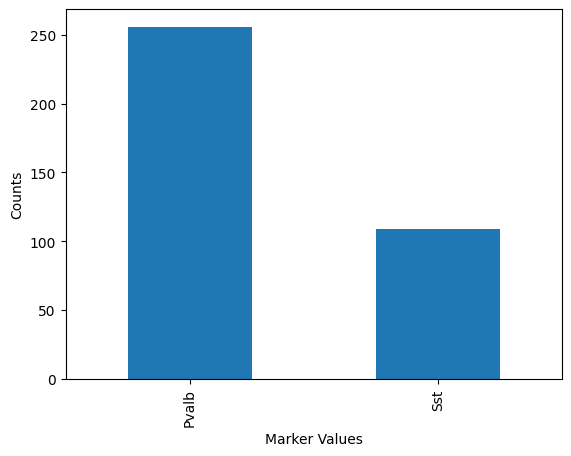

In [3]:
#make bar graph that dipslays value counts from Marker coun

marker_counts = patch_seq['Marker'].value_counts()
marker_counts.plot(kind = "bar")
plt.xlabel("Marker Values")
plt.ylabel("Counts")

<Axes: ylabel='Marker'>

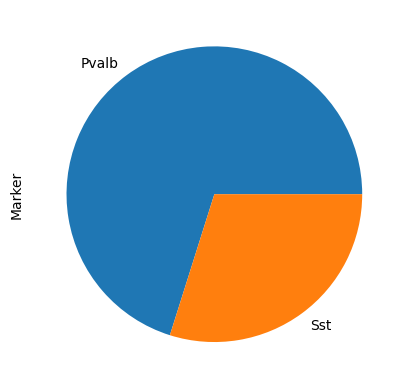

In [4]:
#making pie chart of the above data
marker_counts.plot(kind = "pie")


Text(0, 0.5, 'Fast-Trough Values')

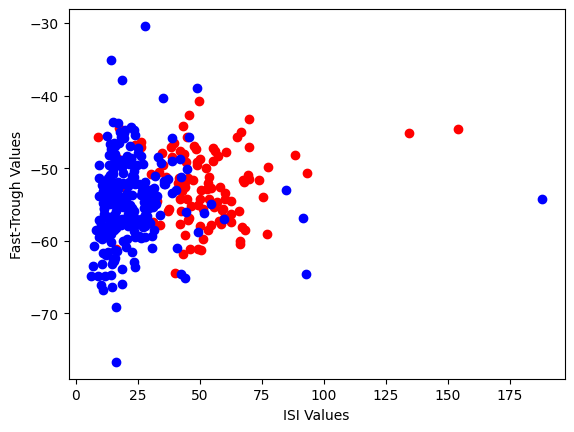

In [5]:
#plottign the values with a scatterplot
for i in range (len(patch_seq)):
  list1 = patch_seq['ISI']
  list2 = patch_seq["Fast_Trough"]
  list3 = patch_seq["Marker"]
  if (not np.isnan(list1[i]) and not np.isnan(list2[i])):
    if (list3[i]=="Sst"):
      plt.scatter(list1[i],list2[i], color ="red")
    elif(list3[i] =="Pvalb"):
      plt.scatter(list1[i],list2[i], color ="blue")

plt.xlabel("ISI Values")
plt.ylabel("Fast-Trough Values")


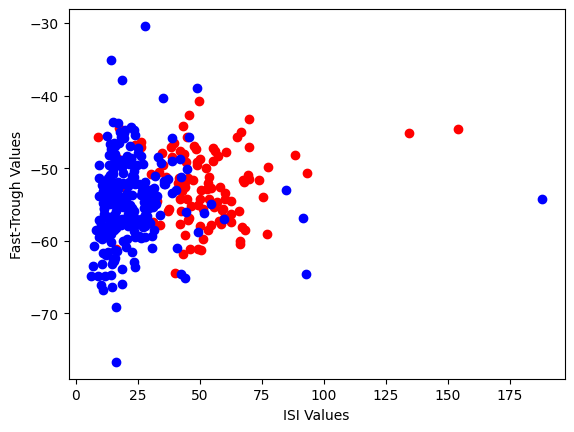

In [6]:
#creating a function that does everything in the above code block

def patchScatter(df):
  '''
  Given a dataframe df (that has fields: "ISI', "Fast_Trough", and "Marker"),
  Generates: scatterplot (ISI Values vs. Fast-Trough Values)
  '''

  for i in range (len(df)):
    list1 = df['ISI']
    list2 = df["Fast_Trough"]
    list3 = df["Marker"]
    if (not np.isnan(list1[i]) and not np.isnan(list2[i])):
      if (list3[i]=="Sst"):
        plt.scatter(list1[i],list2[i], color ="red")
      elif(list3[i] =="Pvalb"):
        plt.scatter(list1[i],list2[i], color ="blue")

  plt.xlabel("ISI Values")
  plt.ylabel("Fast-Trough Values")
  plt. show()

#testing the function
patchScatter(patch_seq)



In [7]:
# getting summary stats (mean,sd,range) of the fast_trough data for both types of cells

#sst summary stats
sst_mean = patch_seq.groupby("Marker")['Fast_Trough'].describe().iloc[1,1]
sst_sd = patch_seq.groupby("Marker")['Fast_Trough'].describe().iloc[1,1]
sst_range = patch_seq.groupby("Marker")['Fast_Trough'].describe().iloc[1,-1] - patch_seq.groupby("Marker")['Fast_Trough'].describe().iloc[1,3]
print(sst_mean, sst_sd,sst_range)

#Pvalb summary stats
pvalb_mean = patch_seq.groupby("Marker")['Fast_Trough'].describe().iloc[0,1]
pvalb_sd = patch_seq.groupby("Marker")['Fast_Trough'].describe().iloc[0,1]
pvalb_range = patch_seq.groupby("Marker")['Fast_Trough'].describe().iloc[0,-1] - patch_seq.groupby("Marker")['Fast_Trough'].describe().iloc[0,3]
print(pvalb_mean, pvalb_sd, pvalb_range)

#even though we didn't learn to create dataframes in class, found it cool to represent the data as its own dataframe
#newDF = pd.DataFrame({" Data": ["mean", "SD", "range"], "Pvalb" : [pvalb_mean, pvalb_sd, pvalb_range], "Sst": [sst_mean, sst_sd,sst_range]})
#newDF

-52.51496750614677 -52.51496750614677 23.593753819999996
-54.54807350679687 -54.54807350679687 46.28125572


###Differences between SST and Pvalb Neurons

Pvalb cells appear to have more of a negative unershoot thatn SSt cells. This is evidenced by the average fast-trough value of -54.54 mV for Pvalb cells compared to the -53. 51 mV value for Sst cells.

In [8]:
 #skew of Fast_trough data
 patch_seq.groupby("Marker")['Fast_Trough'].skew()

Marker
Pvalb    0.19536
Sst      0.00125
Name: Fast_Trough, dtype: float64

###Interpretation of Skew of Fast_Trough Data

The pvalb skew measure is .1956 which is less than the general cutoff value for a normal distribution 0.5. Additionally the skew measure for the SSt cell is .00125 which indicates less skew than the Pvalb, however similarly indicates a normal distribution.

In [9]:
#skew of ISI data
patch_seq.groupby("Marker")['ISI'].skew()

Marker
Pvalb    5.596386
Sst      1.857850
Name: ISI, dtype: float64

###Interpretation of Skew of ISI Data

The ISI values for Pvalb cells hav ea skew of about 5.60 which is wella bove the threshold for normal distributed data. This statistic indicates that the distribution is skewed to the right. The skew of the ISI values for the Sst cells also appears to be to the right but less so.

In [23]:
#T-test to see if the Fast_Trough values of teh two types of cells are significantly different

#isolating the different marker variables
sst_neurons = patch_seq[patch_seq['Marker']=='Sst']
pvalb_neurons = patch_seq[patch_seq['Marker']=='Pvalb']

#an independent T-test for Fast_trough
stats.ttest_ind(sst_neurons['Fast_Trough'], pvalb_neurons['Fast_Trough'])



TtestResult(statistic=3.1660773376899147, pvalue=0.0016757984214133585, df=363.0)

###Significance of T-test (Fast_Trough)

The t-test returned a p-value of about 0.0017, which is less than the significance cutoff of 0.05. Therefore, the probability that the null hypothesis is true (that two datasets are the same) is statistically low. In other words, the difference in undershoot voltage between Pvalb and Sst cells is statistically significant.

In [69]:
#an independent T-test for ISI
import numpy as np
counter = 0
counter1 = 0
justISI_sst = sst_neurons["ISI"].values.tolist()
justISI_pvalb = pvalb_neurons["ISI"].values.tolist()

nonNan_sst = []
nonNan_pvalb = []

#for i in range(len(patch_seq)): - horribly problematic line of code

#looping through the datasets and creating a new list with non-nan values
for i in range(len(justISI_sst)):
  if(~np.isnan(justISI_sst[i])): #this was being werid as a pandas df until I converted it to a python array
    nonNan_sst.append(justISI_sst[i])
    counter = counter + 1

for i in range(len(justISI_pvalb)):
  if(~np.isnan(justISI_pvalb[i])):
    nonNan_pvalb.append(justISI_pvalb[i])
    counter1 = counter1 + 1

stats.ttest_ind(nonNan_sst, nonNan_pvalb)


TtestResult(statistic=14.643966775010774, pvalue=2.694292788633572e-38, df=354.0)

###Significance of T-test (ISI)

The p-value of 2.69 when compared to the .05 confidence cutoff, exceeds it. This demonstrates that there is less evidence to say that the two data sets are significantly different. In other words the Interspike interval values are likely not very different between the Pvalb and SSt cells.
